In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

spotify_df = pd.read_csv('Spotify-final.csv')
spotify_df = pd.DataFrame(spotify_df)
#delete index, title
del spotify_df['Index']
del spotify_df['Title']
del spotify_df['Length (Duration)']
del spotify_df['Artist']
del spotify_df['Year']
spotify_df.rename(columns = {'Top Genre':'Genres'}, inplace = True)

In [5]:
# spotify_df.head()

result = spotify_df.dtypes
print(result)

print(spotify_df['Genres'].unique())

Genres                    object
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object
['pop' 'rock' 'hiphop' 'dance' 'art' 'adult']


In [6]:
# # one hot encode 
# spotify_df_ohe = pd.get_dummies(spotify_df)
# spotify_df_ohe.shape

X=spotify_df.drop('Genres',axis=1)
y=spotify_df['Genres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


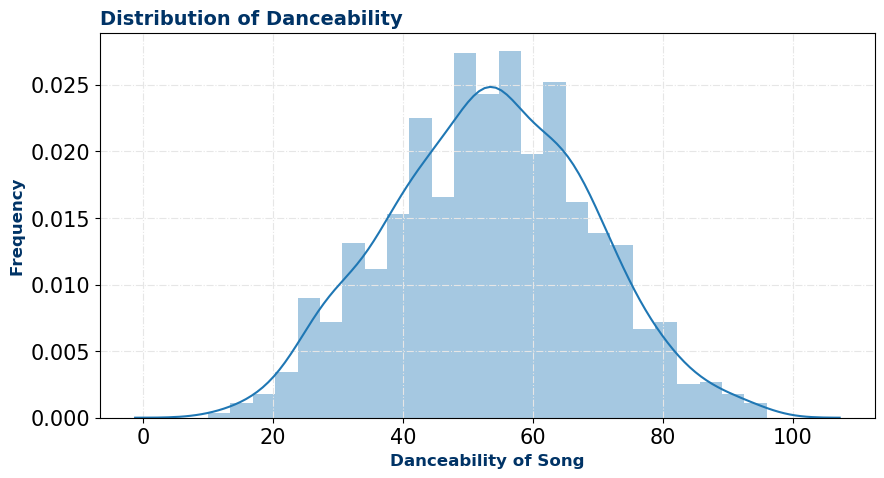

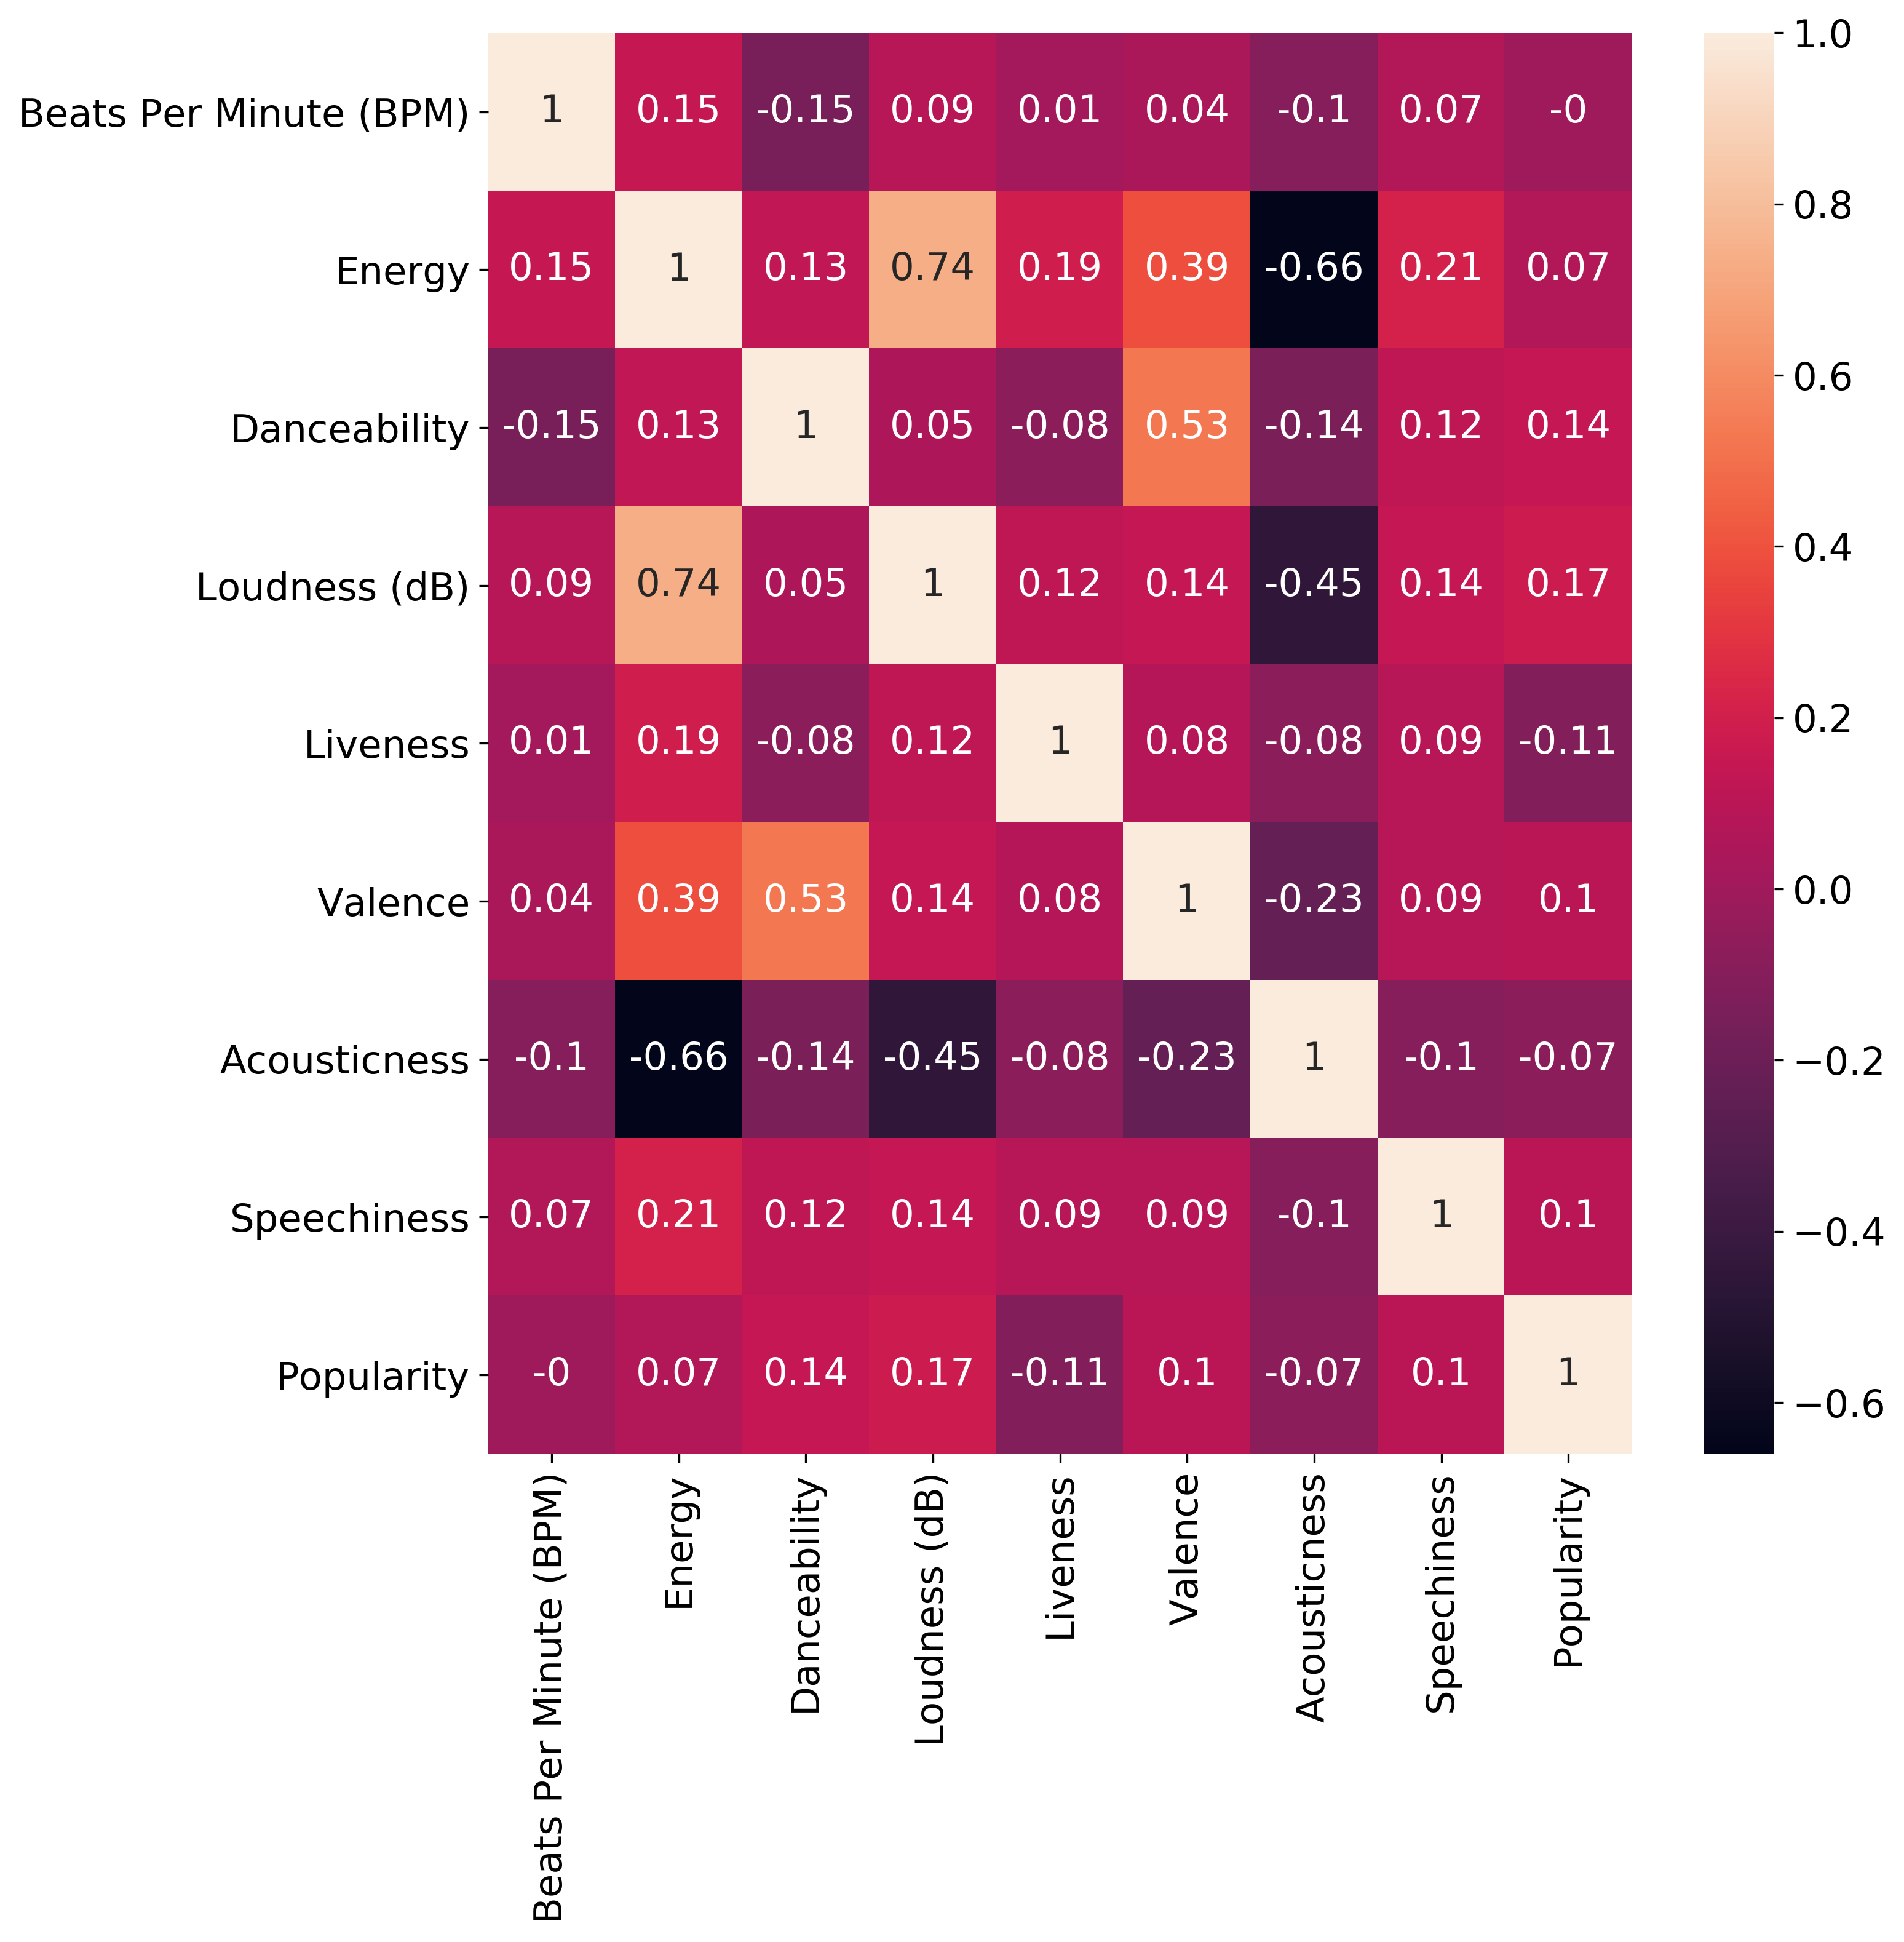

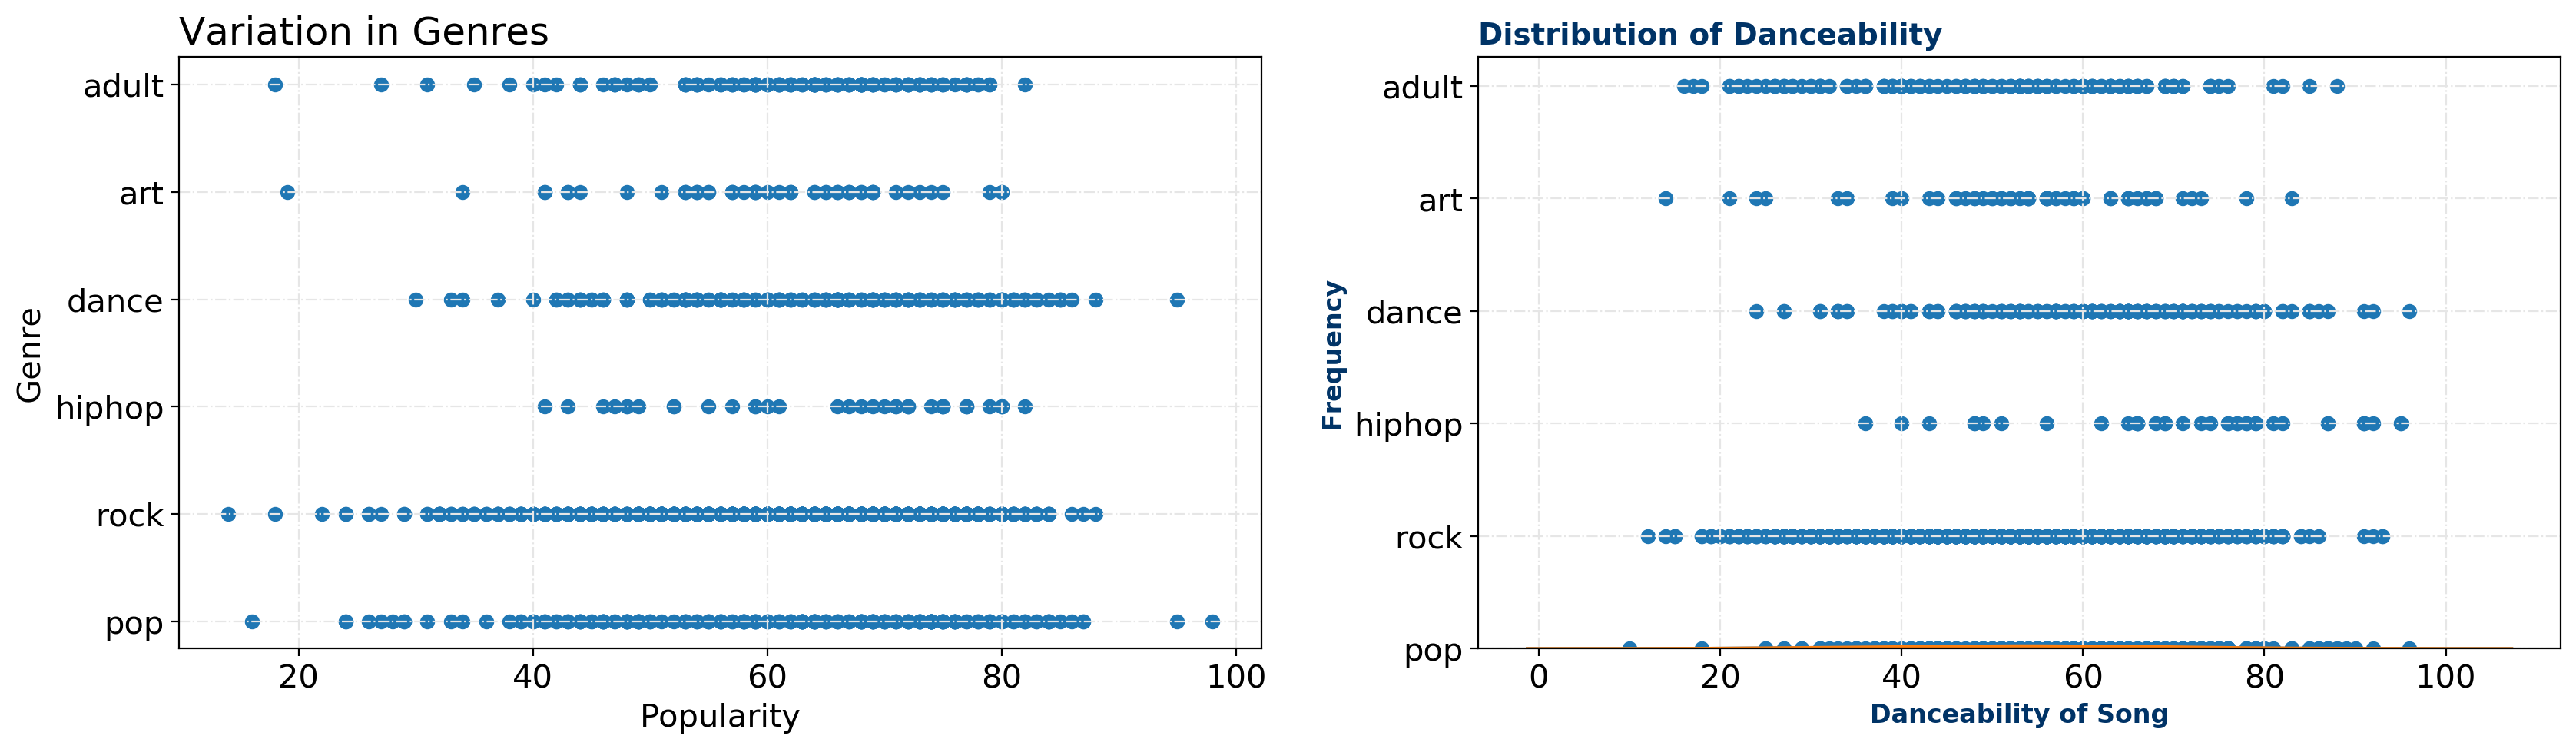

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
sns.distplot(spotify_df['Danceability'])
plt.title("Distribution of Danceability", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("Danceability of Song", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')
plt.show()

In [8]:
plt.figure(figsize=(10, 10),dpi=300)
correlation_matrix = spotify_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#plt.savefig('app/static/heatmap_allvar.jpg',dpi=300)

In [9]:
from matplotlib import rcParams

plt.figure(figsize=(20, 5),dpi=200)

features = ['Popularity', 'Danceability']
target = spotify_df['Genres'] 

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = spotify_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in Genres",loc="Left")
    plt.xlabel(col)
    plt.ylabel('Genre')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


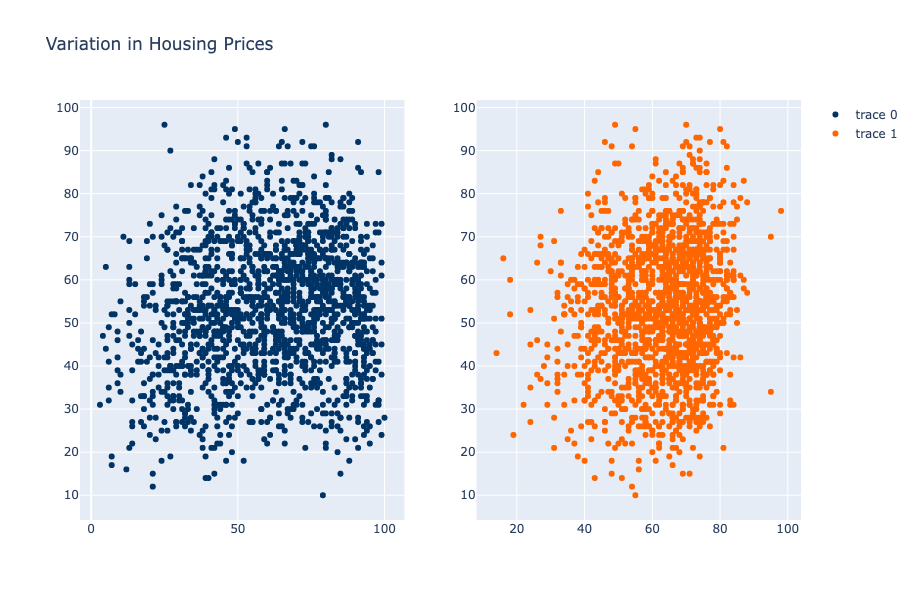

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(
rows=1, cols=2
# subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)

fig.add_trace(
    go.Scatter(x=spotify_df["Energy"],y=spotify_df['Danceability'],mode='markers',
    marker=dict(
            color="#003366"),
        line=dict(color="#003366",width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=spotify_df['Popularity'],y=spotify_df['Danceability'],mode='markers',
    marker=dict(
            color="#FF6600"),
        line=dict(color="#FF6600",width=1)),
    row=1, col=2
)

# Update xaxis properties
# fig.update_xaxes(title_text="Lower State Population (%)", row=1, col=1)
# fig.update_xaxes(title_text="Number of Rooms", row=1, col=2)

# # Update yaxis properties
# fig.update_yaxes(title_text="House Prices ($1000)", row=1, col=1)
# fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
# Update title and height
fig.update_layout(height=600, width=1400, title_text="Variation in Danceability")
#output_file="app/static/baseimage.svg"
#fig.write_image(output_file,width=1200,engine="kaleido")
fig.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
#LOGISTIC REGRESSION

lr =LogisticRegression()
lr_fit = lr.fit(X_train,y_train)
y_pred_lr =lr.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_lr= np.round(precision_score(y_test,y_pred_lr,pos_label='positive',average='micro'),2)
recall_lr= np.round(recall_score(y_test,y_pred_lr,pos_label='positive',average='micro'),2)
print(precision_lr)
print(recall_lr)

print(classification_report(y_test, y_pred_lr))

0.59
0.59
              precision    recall  f1-score   support

       adult       0.33      0.12      0.17        34
         art       0.00      0.00      0.00        18
       dance       1.00      0.02      0.04        47
      hiphop       0.20      0.25      0.22         8
         pop       0.33      0.08      0.13        60
        rock       0.62      0.96      0.75       237

    accuracy                           0.59       404
   macro avg       0.41      0.24      0.22       404
weighted avg       0.56      0.59      0.49       404



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

<Figure size 187.5x187.5 with 0 Axes>

<Figure size 187.5x187.5 with 0 Axes>

<Figure size 187.5x187.5 with 0 Axes>

<Figure size 187.5x187.5 with 0 Axes>

<Figure size 187.5x187.5 with 0 Axes>

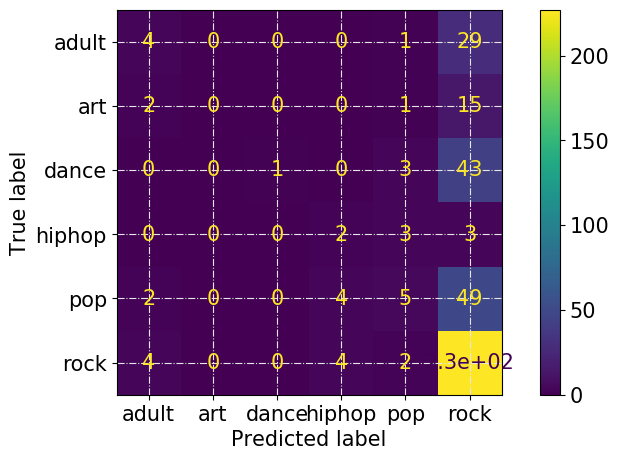

In [30]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels = lr.classes_)
disp_lr = ConfusionMatrixDisplay(conf_matrix_lr, display_labels = lr.classes_)
disp_lr.plot()
plt.show()

In [16]:
#ADA BOOST
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada =ada.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_ada= np.round(precision_score(y_test,y_pred_ada, pos_label='positive',average='micro'),2)
recall_ada= np.round(recall_score(y_test,y_pred_ada, pos_label='positive',average='micro'),2)
print(precision_ada)
print(recall_ada)

0.52
0.52


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [17]:
#BAGGING
bag = BaggingClassifier()
bag.fit(X_train,y_train)
y_pred_bag =bag.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_bag= np.round(precision_score(y_test,y_pred_bag, pos_label='positive',average='micro'),2)
recall_bag= np.round(recall_score(y_test,y_pred_bag, pos_label='positive',average='micro'),2)
print(precision_bag)
print(recall_bag)

0.54
0.54


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [18]:
#RANDOM FOREST 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =rf.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_rf= np.round(precision_score(y_test,y_pred_rf, pos_label='positive',average='micro'),2)
recall_rf= np.round(recall_score(y_test,y_pred_rf, pos_label='positive',average='micro'),2)
print(precision_rf)
print(recall_rf)

0.58
0.58


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [19]:
#GRADIENT BOOST
grad = GradientBoostingClassifier()
grad.fit(X_train,y_train)
y_pred_grad =grad.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_grad= np.round(precision_score(y_test,y_pred_grad, pos_label='positive',average='micro'),2)
recall_grad= np.round(recall_score(y_test,y_pred_grad, pos_label='positive',average='micro'),2)
print(precision_grad)
print(recall_grad)

0.54
0.54


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [20]:
#DECISION TREES
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt =dt.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_dt= np.round(precision_score(y_test,y_pred_dt, pos_label='positive',average='micro'),2)
recall_dt= np.round(recall_score(y_test,y_pred_dt, pos_label='positive',average='micro'),2)
print(precision_dt)
print(recall_dt)

0.42
0.42


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [21]:
#K NEIGHBORS 
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred_kn =kn.predict(X_test)
#accuracy_res=np.round(accuracy_score(y_test,y_pred_res,pos_label='positive',average='micro'),2)
precision_kn= np.round(precision_score(y_test,y_pred_kn, pos_label='positive',average='micro'),2)
recall_kn= np.round(recall_score(y_test,y_pred_kn, pos_label='positive',average='micro'),2)
print(precision_kn)
print(recall_kn)

0.54
0.54


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [34]:
#STACKING ALGORITHM 
from sklearn.ensemble import StackingClassifier

def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('RF', RandomForestClassifier()))
  level0.append(('BAGGING', BaggingClassifier()))
  level0.append(('LR', LogisticRegression(max_iter=2000)))
  level0.append(('KN', KNeighborsClassifier()))
	# define meta learner model
  level1 = RandomForestClassifier()
	# define the stacking ensemble
  model = StackingClassifer(estimators=level0, final_estimator=level1, cv=5)
  return model

In [35]:
def base_models():
  models = dict()
  models["Random Forest"] = RandomForestClassifier()
  models["BAGGING"] = BaggingClassifier()
  models["LR"] = LogisticRegression(max_iter=2000)
  models["KN"] = KNeighborsClassifier()
  models["Stacked Model"] = get_stacking()
  return models

# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

NameError: name 'StackingClassifer' is not defined

[0.59, 0.52, 0.54, 0.58, 0.54, 0.42, 0.54]


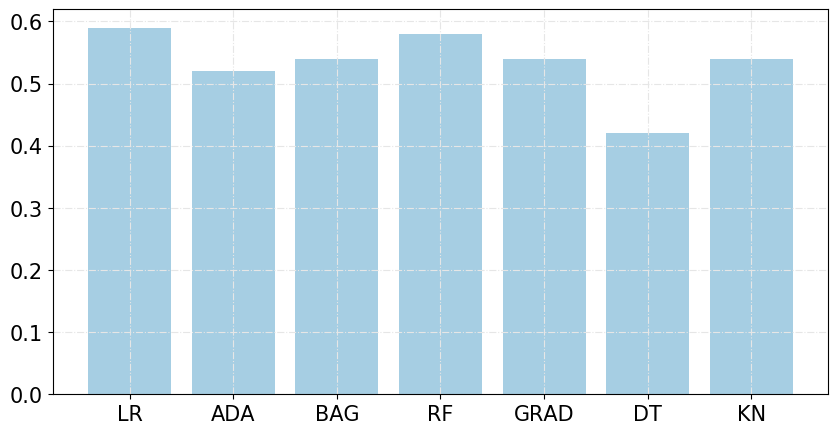

In [42]:
#MAKE ACCURACY VISUAL 

model = ["LR", "ADA", "BAG", "RF", "GRAD","DT", "KN"]
precision_total = [precision_lr, precision_ada, precision_bag, precision_rf, precision_grad, precision_dt, precision_kn]
print(precision_total)

#MAKE DATAFRAME 
precision_df = pd.DataFrame(
    {'model': model,
     'precision': precision_total})

plt.bar(model, precision_total)

# Display the plot
plt.show()

 
#creat bar chart 


